In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


**Loading of train data and storing it in appropriate variable**

In [2]:
train=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
#Using Pandas library in python to read a CSV file named "train.csv", 
#located in the "/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/" directory and storing it in variable "train" as a pandas Dataframe.

In [ ]:
type(train)

In [ ]:
train.shape

In [ ]:
train.head()

In [16]:
train.dtypes
#Returns the datatype of each feature in train dataset

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
Rating                int64
BestScore             int64
Recipe_Review        object
dtype: object

In [ ]:
print(train.isnull().values.any())
#Checks if there are any null values in the train dataset

**Graphs**

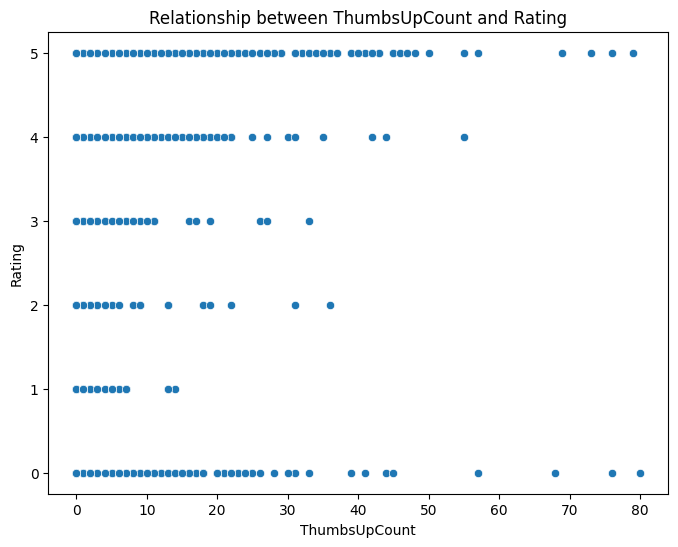

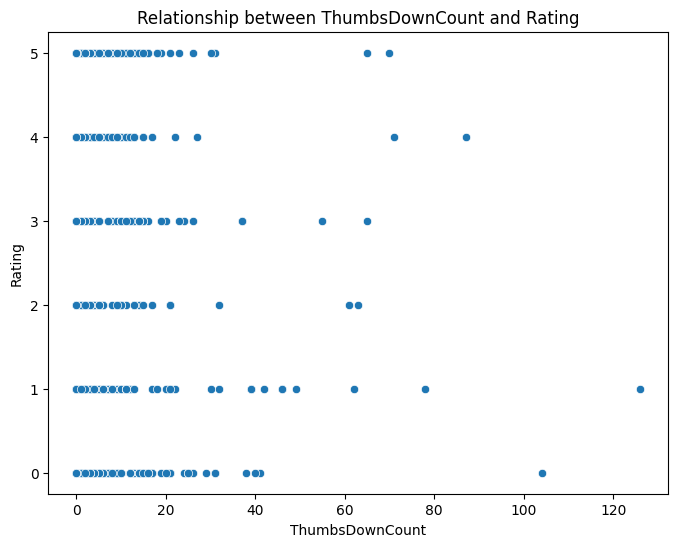

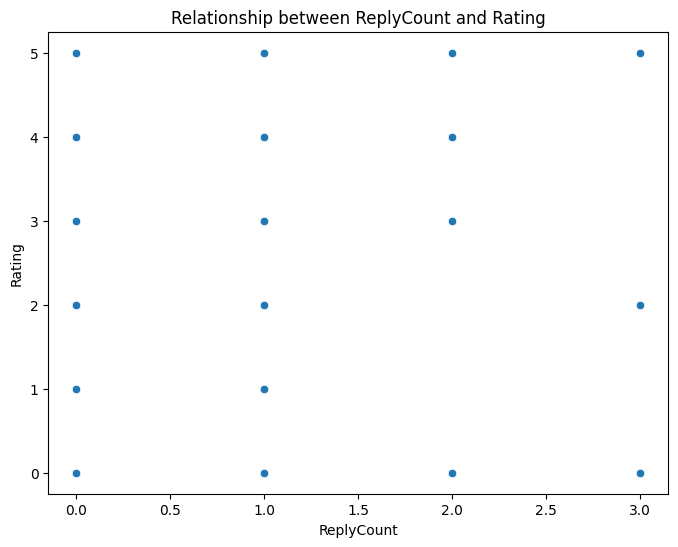

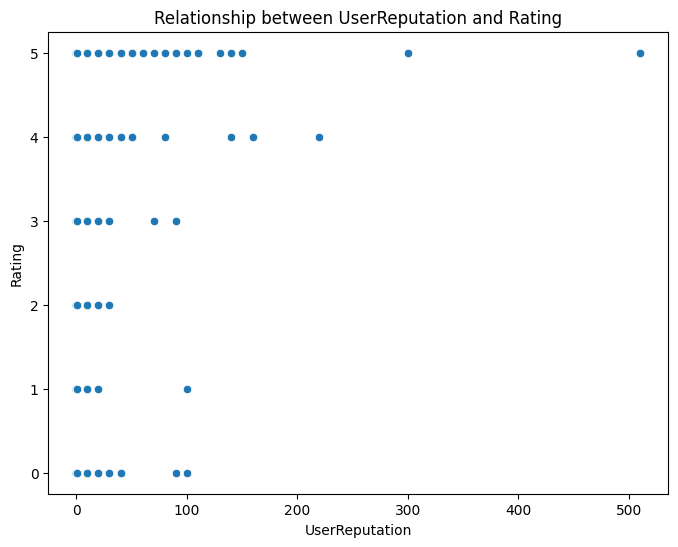

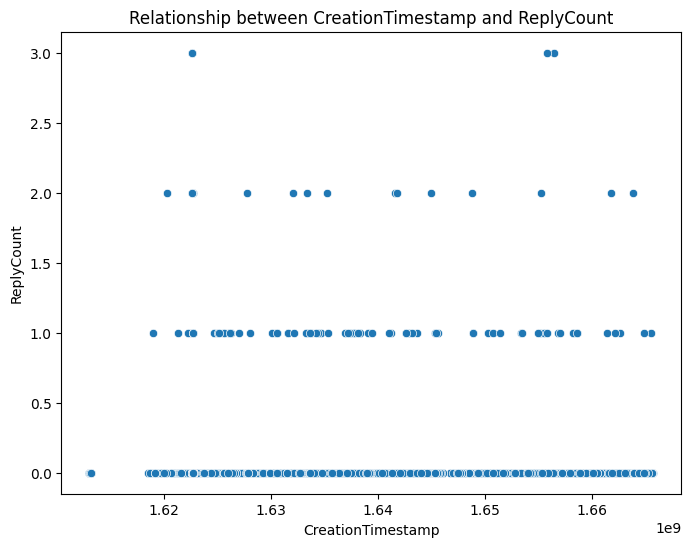

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Relationship between ThumbsUpCount and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='ThumbsUpCount', y='Rating')
plt.title('Relationship between ThumbsUpCount and Rating')
plt.xlabel('ThumbsUpCount')
plt.ylabel('Rating')
plt.show()

# Relationship between ThumbsDownCount and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='ThumbsDownCount', y='Rating')
plt.title('Relationship between ThumbsDownCount and Rating')
plt.xlabel('ThumbsDownCount')
plt.ylabel('Rating')
plt.show()

# Relationship between ReplyCount and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='ReplyCount', y='Rating')
plt.title('Relationship between ReplyCount and Rating')
plt.xlabel('ReplyCount')
plt.ylabel('Rating')
plt.show()

# Relationship between UserReputation and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='UserReputation', y='Rating')
plt.title('Relationship between UserReputation and Rating')
plt.xlabel('UserReputation')
plt.ylabel('Rating')
plt.show()

# Relationship between CreationTimestamp and ReplyCount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='CreationTimestamp', y='ReplyCount')
plt.title('Relationship between CreationTimestamp and ReplyCount')
plt.xlabel('CreationTimestamp')
plt.ylabel('ReplyCount')
plt.show()


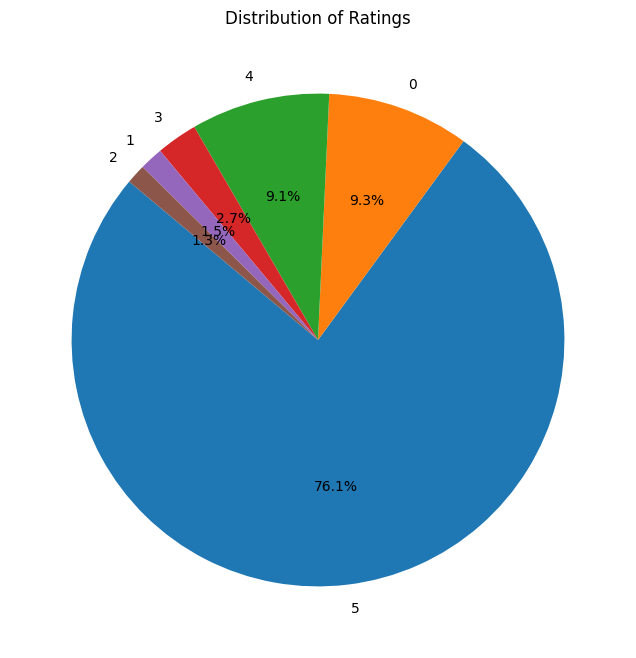

In [5]:
import matplotlib.pyplot as plt


# Count the occurrences of each rating value
rating_counts = train['Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()


In [3]:
y=train['Rating']
X=train.drop(columns=['Rating'])
y = y[X.index]
#Seperating features and label from train dataset and storing features in X
#and label in y

In [4]:
X.dtypes

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
BestScore             int64
Recipe_Review        object
dtype: object

**Exploratory Data Analysis**

*Identifying the feature types:*

Numerical Features:

Features like RecipeNumber, UserReputation, CreationTimestamp, ReplyCount, ThumbsUpCount, ThumbsDownCount, Rating, and BestScore are numerical.

Categorical Features:

Features like RecipeCode, CommentID, UserID, UserName, RecipeName are categorical.

Textual Feature:

The Recipe_Review column contains textual data and can be treated as a text feature for natural language processing (NLP) if needed.

*Insights from graphs:*

As observed from the pie chart above, this dataset is an imbalanced dataset where one label value dominates over other.

This could be a problem because machine learning algorithms tend to perform poorly when one class dominates because they can become biased towards the majority class and struggle to learn patterns from the minority class.

Standard evaluation metrics like accuracy can be misleading in imbalanced datasets. For instance, a classifier that predicts only the majority class can achieve high accuracy but provide little value in terms of meaningful predictions.

In "ThumbsUpCount" and "Rating" scatterplot, we can kinda see, 
1)There are a lot of thumbsup counts when rating is 5.

2)When rating is 0 there are a fair number of thumbs up counts too, this could be those who didn't give the rating and just hit the thumbs up count...?

3)But when rating is low like 1 or 2, thumbs up counts are small in number.

In "ThumbsDownCount" and "Rating" scatterplot we can kinda see, there are a lot of thumbsdown counts for lower ratings and as well as higher ratings...? Which doesn't tell us much.

In "UserReputation" and Rating scatterplot we see as the rating is 5 there are more user reputations.

The "ReplyCount" and "Rating" graph doesn't say anything because there are very few instances which have replies.

The "TimeStamp" and "ReplyCount" graph doesn't say anything too as there are so many zero reply counts.

**Preprocessing of the train data**

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Using "train_test_split" function from the "sklearn.model_selection" module
#which is the part of scikit-learn library. Here we are splitting our original
#train dataset into training (80%) and testing (20%) data of our own to use X_train
#and y_train to train our machine learning model and X_test to evaluate its performance

In [6]:
#Feature Engineering
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import numpy as np

# Custom transformer to handle missing values
class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value=""):
        self.fill_value = fill_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_filled = X.copy()
        X_filled.fillna(self.fill_value, inplace=True)
        return X_filled

# Define pipeline steps for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values for numerical data
])

# Define pipeline steps for categorical features
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical features
])

# Define pipeline steps for text data
text_pipeline = Pipeline([
    ('missing_value_handler', FunctionTransformer(lambda x: x['Recipe_Review'], validate=False)),
    ('missing_value_imputer', MissingValueHandler(fill_value="")),  # Handle missing values for text data
    ('vectorizer', TfidfVectorizer(max_features=1000)),  # Apply TF-IDF vectorization to text data
])

# Combine all pipelines using FeatureUnion
full_pipeline = FeatureUnion([
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
    ('text_pipeline', text_pipeline),
])

# Define the column transformer for different data types
column_transformer = ColumnTransformer([
    ('numerical', numerical_pipeline, ['RecipeNumber','RecipeCode','UserReputation','CreationTimestamp','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore']),  # List numerical feature columns here
    ('categorical', categorical_pipeline, ['RecipeName', 'CommentID', 'UserID', 'UserName']),  # List categorical feature columns here
    ('text', text_pipeline, ['Recipe_Review']),  # Specify the text feature column here
])


# Apply the full pipeline to transform X_train and X_test
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

X_train = X_train_transformed
X_test = X_test_transformed

print(X_train.shape)
print(X_test.shape)

(10908, 29698)
(2728, 29698)


In [7]:
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
X_train=max_abs_scaler.fit_transform(X_train)
X_test=max_abs_scaler.transform(X_test)

#"MaxAbsScaler" is used to scale the features of the training and test data 
#based on their maximum absolute values, of each feature without shifting the data's mean.

In [ ]:
'''from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)
X_test,y_test=smote.fit_resample(X_test,y_test)
print(X.shape)
print(y.shape)'''

#Synthetic Minority Oversampling Technique.
#Oversamples the minority classes to balance the class distribution.

In [8]:
'''X_train = X_train.toarray()
X_test=X_test.toarray()

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

y_train = pd.DataFrame({'Rating': y_train})
y_test = pd.DataFrame({'Rating': y_test})'''

#Converting X_train, X_test from sparse matrices to pandas dataframe
#and converting y_train, y_test from series object to pandas dataframe

In [ ]:
'''from sklearn.decomposition import IncrementalPCA
ipca=IncrementalPCA(n_components=100)
X_train=ipca.fit_transform(X_train)
X_test=ipca.transform(X_test)
print('Number of components retained:',ipca.n_components_)
print(X_train.shape)'''

#Dimensionality reduction of the dataset using Incremental Principal Component Analysis.

In [9]:
type(X_train)

scipy.sparse._csr.csr_matrix

**Model Building**

In [ ]:
#Initializing and traing XGBoost Classifier (Extreme Gradient Boosting) 
#for making predictions on test dataset.
#Boosting algorithm

'''from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(n_estimators=100, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # Using 3-fold cross-validation
                           verbose=2,
                           n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize XGBoost classifier with best hyperparameters
best_model = XGBClassifier(**best_params, n_estimators=1000, random_state=42)  # You may increase n_estimators for better performance

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)'''

In [ ]:
#Performing hyperparameter tuning for LogisticRegression using GridSearch
#and then evaluating best model's performance on seperate test set.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
model=LogisticRegression(max_iter=1000)
param_grid = {
    'penalty': ['l2'],  # Regularization penalty (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
print("Test set accuracy with best hyperparameters:", test_score)

In [ ]:
#Performing hyperparameter tuning for KNeighborsClassifier using GridSearch
#and then evaluating best model's performance on seperate test set.

'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
print("Test set accuracy with best hyperparameters:", test_score)'''

In [ ]:
#Initializing and traing Support Vector Classifier for making predictions on test dataset.
'''from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)'''

In [ ]:
#Initializing and traing Decision Tree Classifier for making predictions on test dataset.
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)'''

In [ ]:
#Initializing and traing Random Forest Classifier for making predictions on test dataset.
#Bagging algorithm
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)'''

In [ ]:
#Initializing and traing Multi Layer Perceptron Classifier for making predictions on test dataset.
'''from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)'''

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print('Macro-averaged F1 score:', f1_score(y_test, y_pred, average='macro'))

**Loading of test data and storing it in appropriate variable.**

In [4]:
test=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

#Using Pandas library in python to read a CSV file named "test.csv", 
#located in the "/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv" directory and storing it in variable "test" as a pandas Dataframe.

In [ ]:
test.shape

**Preprocessing of the test data**

In [ ]:
#Feature Engineering
# Apply the full pipeline to transform X_train and X_test
test_transformed = column_transformer.transform(test)

test = test_transformed

print(test.shape)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
test=max_abs_scaler.fit_transform(test)

#"MaxAbsScaler" is used to scale the features of the training and test data 
#based on their maximum absolute values, ensuring that each feature's values are within the range [-1, 1] without shifting the data's mean.

In [ ]:
print(test.shape)

**Predicting the label ("Rating") for the test data using the best model we've obtained from previously training our train data.**

In [ ]:
prediction=best_model.predict(test)

**Loading "sample.csv", which is a sample output file and converting it as pandas dataframe to see the format of the output for better understanding.**

In [ ]:
sample=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')
sample.head()

**Making the submission file, which is in the same format as "sample.csv, with columns 'ID' and 'prediction' (Our rating prediction on test data, we got from the best model.)"**

In [ ]:
submission=pd.DataFrame(columns=['ID','Rating'])
submission['ID']=[i for i in range(1,len(prediction)+1)]
submission['Rating']=prediction
submission.to_csv('submission.csv',index=False)

In [ ]:
submission.head()

**Comparing Models Performance**

*Top 3 Best Performed Models*

1)Best Model: Logistic Regression (with Best hyperparameters: {'C': 10, 'penalty': 'l2'}) Submission score: 0.77540

2)XGBoost Classifier with a Submission score: 0.77474

3)SVC with a Submission score: 0.77166

*Analysis of the top three best-performing models for predicting Recipe Rating:*

*1. Logistic Regression:(Best hyperparameters: {'C': 10, 'penalty': 'l2'}) *

Submission score: 0.77540

Logistic Regression is a linear model that works well when there is a linear relationship between the features and the target variable. It uses regularization to prevent overfitting, and in this case, the L2 penalty (Ridge regularization) with a regularization strength of C=10 was found to be optimal.

The accuracy achieved by this model on the test set is 77.54%.

Insights: This model's performance suggests that there is a discernible linear relationship between the features in the dataset and the Recipe Rating.


*2. Extreme Gradient Boost Classifier (XGBoost)*

Submission score: 0.77474

XGBoost is an ensemble learning method known for its high performance in structured/tabular data. It uses gradient boosting techniques to iteratively improve the model's predictive power.

The XGBoost Classifier achieved an accuracy of 77.47% on the test set.

Insights: The XGBoost model performed slightly below the Logistic Regression model but still yielded competitive results, indicating that ensemble methods can also be effective for this prediction task.

*3. Support Vector Classifier (SVC)*

Submission score: 0.77166

SVC with a linear kernel is a linear classifier that works by finding the hyperplane that best separates the classes in the feature space. It is effective when the data is linearly separable.

The SVC model achieved an accuracy of 77.17% on the test set.

Insights: The SVC model with a linear kernel performed slightly lower than both Logistic Regression and XGBoost. This could be due to the nature of the data and the assumption of linear separability, which may not fully capture the complexities of the Recipe Rating prediction task.

***Overall, all three models achieved reasonably high accuracies, indicating that they can make meaningful predictions about Recipe Ratings based on the given dataset. The choice between these models could depend on factors such as interpretability (Logistic Regression), predictive power (XGBoost), or the underlying assumptions about the data (SVC with linear kernel).***

In [1]:
!git init

Initialized empty Git repository in /kaggle/working/.git/


In [2]:
!git config --global user.name "Sai Srikar"

In [3]:
!git config --global user.email "iamsrikar265@gmail.com"

In [5]:
!git remote add origin https://github.com/Iamsrikar265/prediction-time.git

In [6]:
!git add .

In [7]:
!git commit -m "Initial commit from Kaggle"

On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [8]:
!git push -u origin master

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/Iamsrikar265/prediction-time.git'


In [9]:
!pwd

/kaggle/working
